In [139]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import re
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob.classifiers import NaiveBayesClassifier

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [60]:
#FILTER WARNINGS
warnings.filterwarnings('ignore')

In [4]:
#LOADING THE DATASET

df = pd.read_csv('/content/Womens Clothing E-Commerce Reviews.csv',header = 0,index_col = 0)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
df.sample(5)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
6775,1033,40,NaN,I don't know why i had the opposite problem mo...,4,1,0,General Petite,Bottoms,Jeans
19027,905,36,Pretty,I thought this sweater was pretty and soft and...,4,1,1,General,Tops,Fine gauge
2219,876,27,NaN,NaN,2,0,0,General Petite,Tops,Knits
9191,862,35,Good for workout,This tank is really thin and airy without bein...,4,1,0,General,Tops,Knits
12409,828,32,From a petite - love this shirt,"It's a little roomy, but this shirt is spectac...",5,1,0,General,Tops,Blouses


In [6]:
df.duplicated().sum()

21

In [8]:
df.shape

(23486, 10)

In [9]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23465 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23465 non-null  int64 
 1   Age                      23465 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22640 non-null  object
 4   Rating                   23465 non-null  int64 
 5   Recommended IND          23465 non-null  int64 
 6   Positive Feedback Count  23465 non-null  int64 
 7   Division Name            23451 non-null  object
 8   Department Name          23451 non-null  object
 9   Class Name               23451 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [14]:
(df.isna().sum()/df.shape[0])*100

Clothing ID                 0.000000
Age                         0.000000
Title                      16.147454
Review Text                 3.515875
Rating                      0.000000
Recommended IND             0.000000
Positive Feedback Count     0.000000
Division Name               0.059663
Department Name             0.059663
Class Name                  0.059663
dtype: float64

In [15]:
df.isna().sum()

Clothing ID                   0
Age                           0
Title                      3789
Review Text                 825
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [16]:
df.shape

(23465, 10)

In [17]:
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [22]:
df.columns = df.columns.str.lower()



In [23]:
df.columns

Index(['clothing id', 'age', 'title', 'review text', 'rating',
       'recommended ind', 'positive feedback count', 'division name',
       'department name', 'class name'],
      dtype='object')

In [24]:
df.dtypes

clothing id                 int64
age                         int64
title                      object
review text                object
rating                      int64
recommended ind             int64
positive feedback count     int64
division name              object
department name            object
class name                 object
dtype: object

In [25]:
df['review text'][1]

'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.'

In [28]:
df['recommended ind'].value_counts()

1    19293
0     4172
Name: recommended ind, dtype: int64

In [29]:
review = df[['review text','recommended ind']]
review.head()

,review text,recommended ind
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [31]:
review = review.rename(columns = {'review text':'review','recommended ind':'recommend'})
review.head()

,review,recommend
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [32]:
review.isna().sum()

review       825
recommend      0
dtype: int64

In [33]:
review.dropna(subset = ['review'],inplace = True)

In [34]:
review.isna().sum()

review       0
recommend    0
dtype: int64

In [36]:
review['review'] = review['review'].astype('str')

In [37]:
review.dtypes

review       object
recommend     int64
dtype: object

In [39]:
review.shape

(22640, 2)

In [42]:
review.recommend.value_counts()

1    18539
0     4101
Name: recommend, dtype: int64

Text(0.5, 1.0, 'Propotion target class')

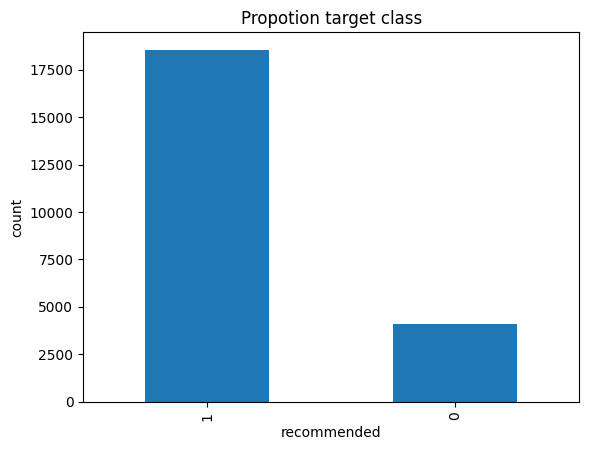

In [44]:
review.recommend.value_counts().plot(kind = 'bar')
plt.xlabel('recommended')
plt.ylabel('count')
plt.title('Propotion target class')

In [45]:
df.isnull()

,clothing id,age,title,review text,rating,recommended ind,positive feedback count,division name,department name,class name
0,False,False,True,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
23481,False,False,False,False,False,False,False,False,False,False
23482,False,False,False,False,False,False,False,False,False,False
23483,False,False,False,False,False,False,False,False,False,False
23484,False,False,False,False,False,False,False,False,False,False


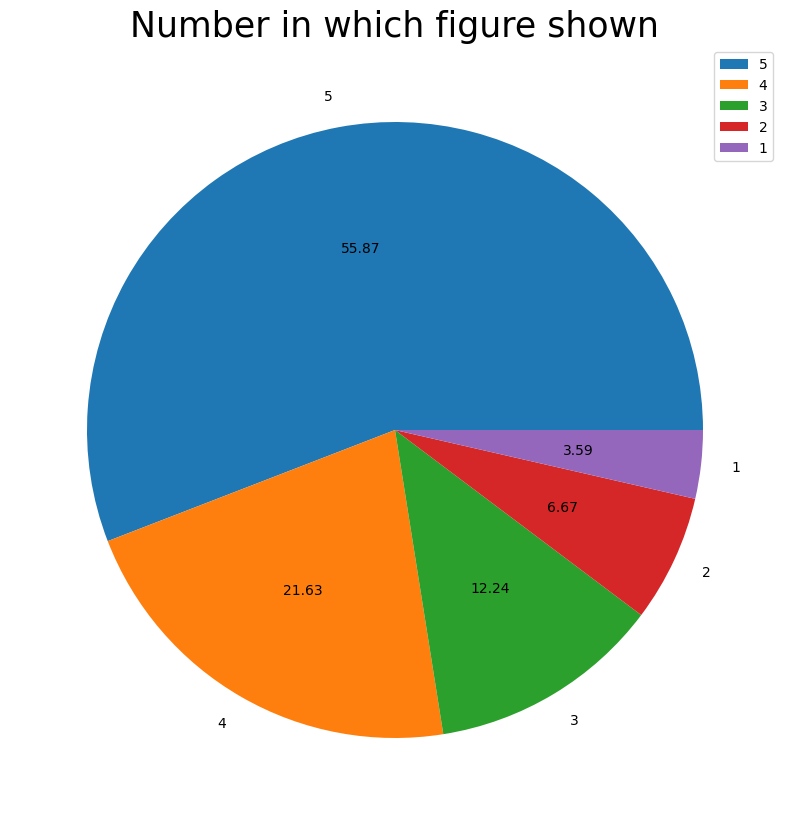

In [48]:
plt.figure(figsize = (10,10))

ax = df.rating.value_counts()

labels = df['rating'].value_counts().index

plt.pie(ax,labels = labels,autopct = '%.2f')

plt.title('Number in which figure shown',fontsize = 25,color = 'black')
plt.legend()
plt.show()

In [50]:
covv = df.cov()
covv


<ipython-input-50-81a726ef40d2>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covv = df.cov()


,clothing id,age,rating,recommended ind,positive feedback count
clothing id,41356.117457,45.374544,-4.284301,-1.264322,53.841979
age,45.374544,150.815897,0.366971,0.144133,3.015069
rating,-4.284301,0.366971,1.232718,0.336346,-0.409825
recommended ind,-1.264322,0.144133,0.336346,0.146191,-0.150213
positive feedback count,53.841979,3.015069,-0.409825,-0.150213,32.538442


<Axes: >

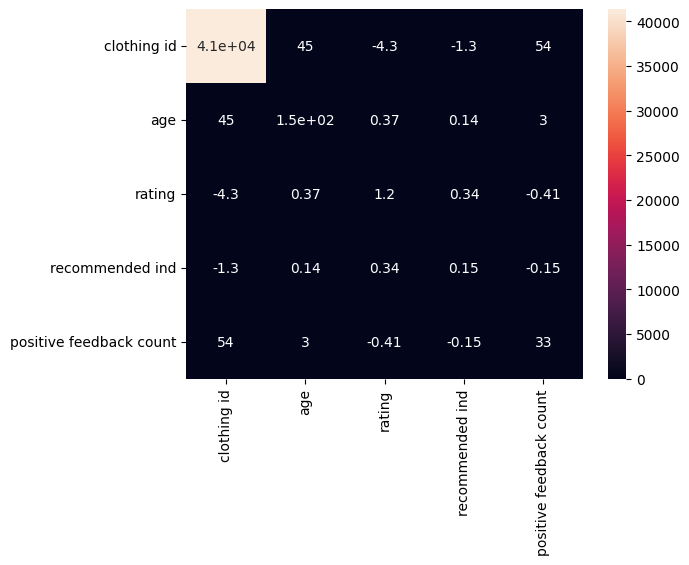

In [53]:
sns.heatmap(covv,annot = True)

<Axes: >

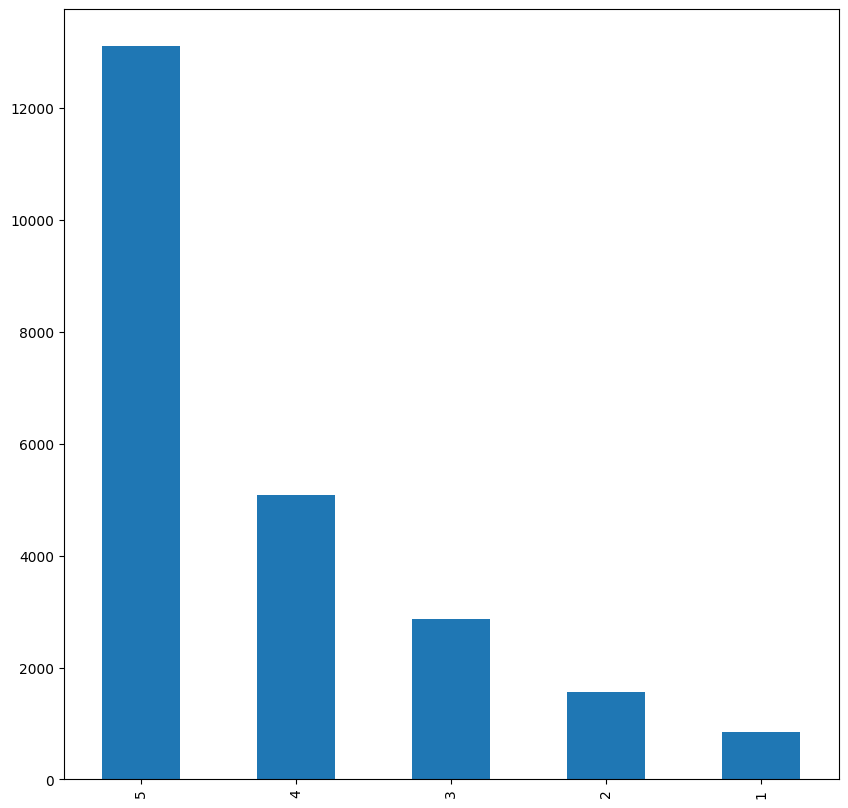

In [57]:
plt.figure(figsize=(10,10))
ax=df.rating.value_counts()[:10]
ax.plot(kind='bar')

<Axes: xlabel='rating', ylabel='Density'>

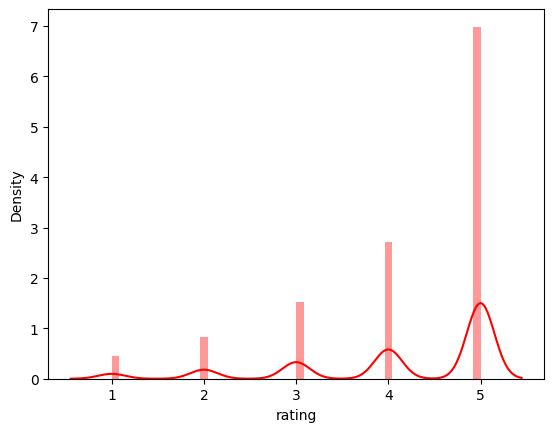

In [61]:
sns.distplot(df.rating,color = 'red')

In [71]:
review['review'][1]

'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.'

In [65]:
def tokens(words):
  words = re.sub('[^a-zA-Z]',' ',words)
  text = words.lower().split()
  return ' '.join(text)

In [66]:
review['clear_review'] = review['review'].apply(tokens)
review.head()

,review,recommend,clear_review
0,Absolutely wonderful - silky and sexy and comf...,1,absolutely wonderful silky and sexy and comfor...
1,Love this dress! it's sooo pretty. i happene...,1,love this dress it s sooo pretty i happened to...
2,I had such high hopes for this dress and reall...,0,i had such high hopes for this dress and reall...
3,"I love, love, love this jumpsuit. it's fun, fl...",1,i love love love this jumpsuit it s fun flirty...
4,This shirt is very flattering to all due to th...,1,this shirt is very flattering to all due to th...


In [73]:
review['clear_review'] = review['clear_review'].astype('str')

In [75]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [78]:
#Show some stop words

stop_words = stopwords.words('english')
print(stop_words[::10])

['i', "you've", 'himself', 'they', 'that', 'been', 'a', 'while', 'through', 'in', 'here', 'few', 'own', 'just', 're', 'doesn', 'ma', "shouldn't"]


In [79]:
#Clothing stop words

clothes = ['dress','color','wear','top','sweater','material','shirt','jeans','pant','skirt','order','white','black','fabric','blouse','sleeve','even','jacket']

In [80]:
def stopwords(review):
  text = [word.lower()  for word in review.split() if word.lower() not in stop_words and word.lower() not in clothes]
  return ' '.join(text)

In [81]:
review['clear_review'] = review['clear_review'].apply(stopwords)
review.head()

,review,recommend,clear_review
0,Absolutely wonderful - silky and sexy and comf...,1,absolutely wonderful silky sexy comfortable
1,Love this dress! it's sooo pretty. i happene...,1,love sooo pretty happened find store glad bc n...
2,I had such high hopes for this dress and reall...,0,high hopes really wanted work initially ordere...
3,"I love, love, love this jumpsuit. it's fun, fl...",1,love love love jumpsuit fun flirty fabulous ev...
4,This shirt is very flattering to all due to th...,1,flattering due adjustable front tie perfect le...


In [82]:
review['clear_review'][267]

'love look quality amp say fits true size way short amp amp tall wish came tall sizes'

In [86]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [87]:
lem = WordNetLemmatizer()

def lemma(text):
  lemma_text = [lem.lemmatize(word)  for word in text.split()]
  return ' '.join(lemma_text)

In [88]:
review['clear_review'] = review['clear_review'].apply(lemma)
review.head()

,review,recommend,clear_review
0,Absolutely wonderful - silky and sexy and comf...,1,absolutely wonderful silky sexy comfortable
1,Love this dress! it's sooo pretty. i happene...,1,love sooo pretty happened find store glad bc n...
2,I had such high hopes for this dress and reall...,0,high hope really wanted work initially ordered...
3,"I love, love, love this jumpsuit. it's fun, fl...",1,love love love jumpsuit fun flirty fabulous ev...
4,This shirt is very flattering to all due to th...,1,flattering due adjustable front tie perfect le...


In [90]:
review['clear_review'][1]

'love sooo pretty happened find store glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite'

In [91]:
positive = review[review.recommend == 1]
negative = review[review.recommend == 0]
positive.head()

,review,recommend,clear_review
0,Absolutely wonderful - silky and sexy and comf...,1,absolutely wonderful silky sexy comfortable
1,Love this dress! it's sooo pretty. i happene...,1,love sooo pretty happened find store glad bc n...
3,"I love, love, love this jumpsuit. it's fun, fl...",1,love love love jumpsuit fun flirty fabulous ev...
4,This shirt is very flattering to all due to th...,1,flattering due adjustable front tie perfect le...
6,I aded this in my basket at hte last mintue to...,1,aded basket hte last mintue see would look lik...


In [95]:
positive_words = []

for review in positive.clear_review:
  positive_words.append(review)

positive_words = ' '.join(positive_words)
positive_words[:48]

'absolutely wonderful silky sexy comfortable love'

In [97]:
negative_words = []

for review in negative.clear_review:
  negative_words.append(review)

negative_words = ' '.join(negative_words)
negative_words[:400]

'high hope really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c love tracy reese dress one petite foot tall usually p brand pretty package lot long full overwhelmed small f'

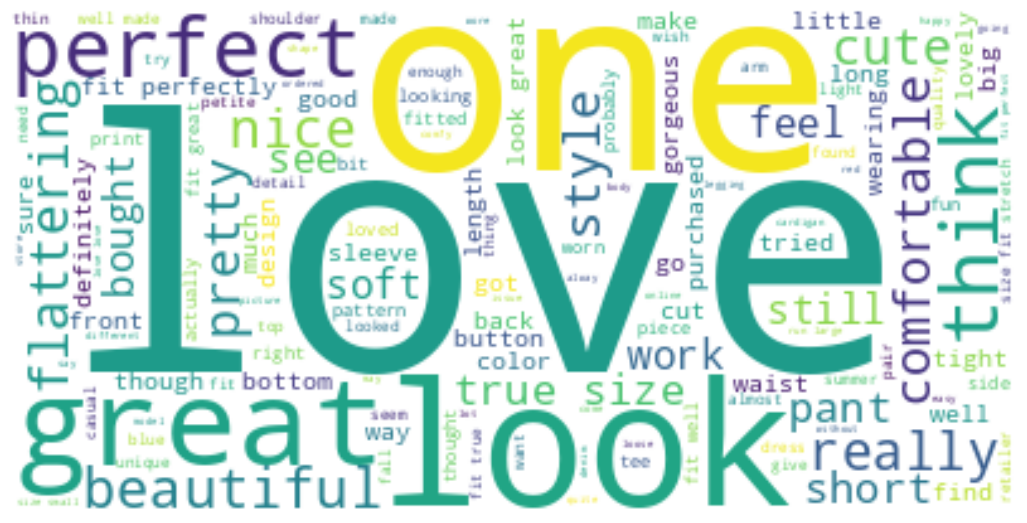

In [99]:
wordcloud = WordCloud(background_color = 'white',max_words = len(positive_words))

wordcloud.generate(positive_words)

plt.figure(figsize = (13,13))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

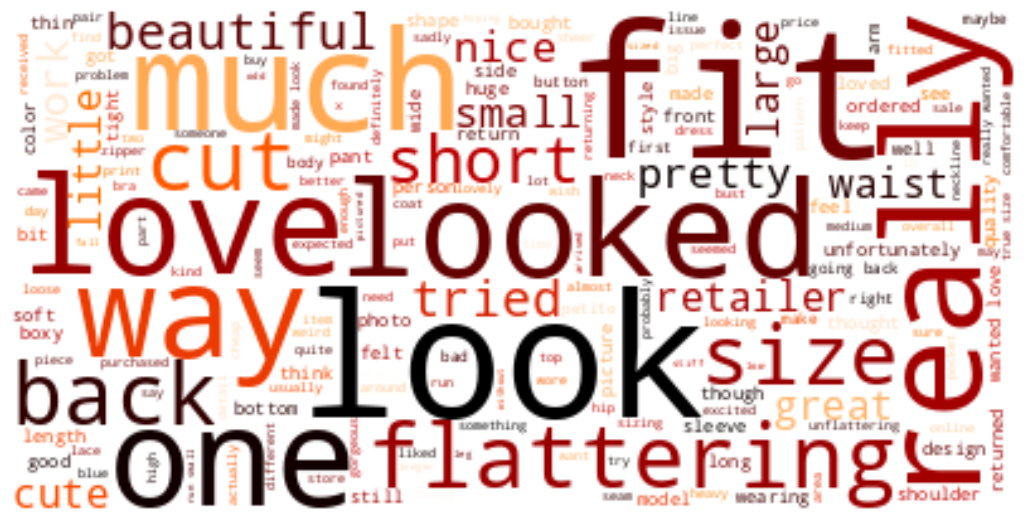

In [101]:
wordcloud = WordCloud(background_color = 'white',max_words = len(negative_words),colormap = 'gist_heat')

wordcloud.generate(negative_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [102]:
negative.head()

,review,recommend,clear_review
2,I had such high hopes for this dress and reall...,0,high hope really wanted work initially ordered...
5,"I love tracy reese dresses, but this one is no...",0,love tracy reese dress one petite foot tall us...
10,Dress runs small esp where the zipper area run...,0,run small esp zipper area run ordered sp typic...
22,"First of all, this is not pullover styling. th...",0,first pullover styling side zipper purchased k...
25,"Loved the material, but i didnt really look at...",0,loved didnt really look long purchased large m...


In [167]:
X = positive['clear_review']
y = positive['recommend']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [169]:
vect = CountVectorizer(min_df=5, ngram_range=(1, 2)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

print(len(vect.get_feature_names_out()))

14101


In [170]:
#NAIVE BAYES
model_nb = Pipeline([('vect', CountVectorizer(min_df =5,ngram_range=(1,2))),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())])

model_nb.fit(X_train,y_train)

ytest = np.array(y_test)

pred_y = model_nb.predict(X_test)

In [171]:
print(pred_y)

[1 1 1 ... 1 1 1]


In [176]:
print('accuracy %s' % accuracy_score(pred_y,y_test))
print(classification_report(ytest,pred_y))

accuracy 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3708

    accuracy                           1.00      3708
   macro avg       1.00      1.00      1.00      3708
weighted avg       1.00      1.00      1.00      3708



In [183]:
#RANDOM FOREST

model_rf = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
                    ('tfidf', TfidfTransformer()),
                    ('clf-rf', RandomForestClassifier(n_estimators=50)),
                    ])

model_rf.fit(X_train, y_train)

ytest = np.array(y_test)
pred = model_rf.predict(X_test)

In [184]:
print('accuracy %s' % accuracy_score(pred, y_test))
print(classification_report(ytest, pred))

accuracy 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3708

    accuracy                           1.00      3708
   macro avg       1.00      1.00      1.00      3708
weighted avg       1.00      1.00      1.00      3708



In [188]:
#ADA BOOSTING
ada = Pipeline([('vect', CountVectorizer(min_df = 5, ngram_range = (1,2))),
                ('tfidf', TfidfTransformer()),
                ('clf_ada',AdaBoostClassifier())])
ada.fit(X_train, y_train)
ytest = np.array(y_test)
ada_pred = ada.predict(X_test)

In [189]:
print('accuracy%s' % accuracy_score(ada_pred,y_test))
print(classification_report(ytest,ada_pred))

accuracy1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3708

    accuracy                           1.00      3708
   macro avg       1.00      1.00      1.00      3708
weighted avg       1.00      1.00      1.00      3708



In [190]:

#BEST MODEL

nb_acc = accuracy_score(pred_y,y_test)
rf_acc = accuracy_score(pred,y_test)
ada_acc = accuracy_score(ada_pred,y_test)

In [191]:
models = pd.DataFrame({
    'Model' : ['Naive Bayes','Random Forest','AdaBoosting'],
    'score' : [nb_acc,rf_acc,ada_acc]
})


In [193]:
print(models)

           Model  score
0    Naive Bayes    1.0
1  Random Forest    1.0
2    AdaBoosting    1.0
